In [1]:
import os
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import plotly.plotly as py
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import seaborn as sns

%matplotlib inline

In [2]:
os.chdir('C:\\Users\\murugesan.r\\Desktop\\Competitions\\Text normalization')
os.getcwd()

'C:\\Users\\murugesan.r\\Desktop\\Competitions\\Text normalization'

In [3]:
train_text = pd.read_csv("en_train.csv")

In [4]:
print("Null values\n")
print(train_text.isnull().sum(axis = 0))
print("Total non-null values per column\n")
print(train_text.count())

Null values

sentence_id     0
token_id        0
class           0
before         51
after          46
dtype: int64
Total non-null values per column

sentence_id    9918441
token_id       9918441
class          9918441
before         9918390
after          9918395
dtype: int64


In [5]:
print(train_text.dtypes)

sentence_id     int64
token_id        int64
class          object
before         object
after          object
dtype: object


In [6]:
train_text.head()

,sentence_id,token_id,class,before,after
0,0,0,PLAIN,Brillantaisia,Brillantaisia
1,0,1,PLAIN,is,is
2,0,2,PLAIN,a,a
3,0,3,PLAIN,genus,genus
4,0,4,PLAIN,of,of


In [7]:
train_text['class'].value_counts()

#This shows the unique classes and the count of each class
#Clearly Plain token dominates everything else

PLAIN         7353693
PUNCT         1880507
DATE           258348
LETTERS        152795
CARDINAL       133744
VERBATIM        78108
MEASURE         14783
ORDINAL         12703
DECIMAL          9821
MONEY            6128
DIGIT            5442
ELECTRONIC       5162
TELEPHONE        4024
TIME             1465
FRACTION         1196
ADDRESS           522
Name: class, dtype: int64

In [8]:
train_text['change'] = train_text['before'] != train_text['after']
train_text['change'].value_counts()

False    9258602
True      659839
Name: change, dtype: int64

#### Looking at the classes where there are token changes

In [9]:
train_text[train_text['change'] == True]['class'].value_counts()

#Interestingly Plain is not the highest here, and all the Date and Cardinal fields are changing

DATE          258348
LETTERS       144369
CARDINAL      133744
PLAIN          36518
VERBATIM       25837
MEASURE        14761
ORDINAL        12703
DECIMAL         9821
MONEY           6125
DIGIT           5442
ELECTRONIC      4964
TELEPHONE       4024
TIME            1465
FRACTION        1196
ADDRESS          522
Name: class, dtype: int64

### Distribution analysis

In [10]:
random.seed(0)
train_sample = train_text

#### Class analysis

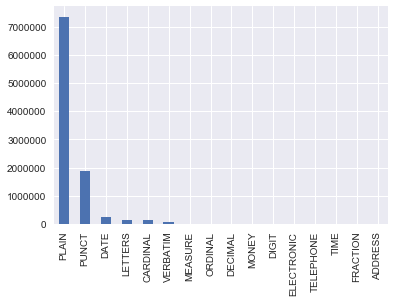

In [47]:
class_value = train_sample['class'].value_counts()
train_sample['class'].value_counts().plot(kind  = "bar")

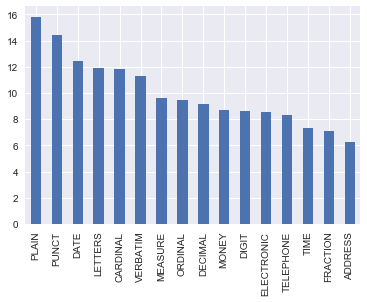

In [170]:
np.log(train_sample['class'].value_counts()).plot(kind  = "bar")

In [171]:
agg_count_log = np.log(agg_count).unstack(1)
#agg_count_log['total'] = agg_count_log['True'] +  agg_count_log['False']

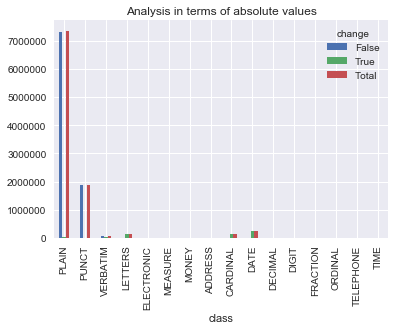

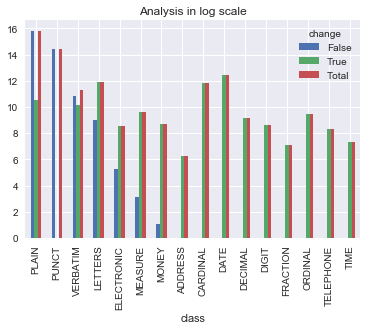

In [172]:
agg_count = train_sample.loc[:,['class','change']].groupby(['class','change'])['class'].count()
agg_count = agg_count.unstack(1)
agg_count['Total']= agg_count[True].fillna(0) + agg_count[False].fillna(0)


agg_count.sort_values([0],ascending = [0]).plot(kind = "bar", title = "Analysis in terms of absolute values")

np.log(agg_count).sort_values([0],ascending = [0]).plot(kind = "bar", title = "Analysis in log scale")

#### Observations: Punctuations don't get normalized while the other groups from Address to Time, even though they are small in absolute number, almost of them are normalized

In [173]:
((agg_count/ agg_count['Total'].sum(axis = 0)) * 100).sort_values(['Total'], ascending = [0]).fillna(0)

change,False,True,Total
class,,,
PLAIN,73.773439,0.368183,74.141622
PUNCT,18.959703,0.000000,18.959703
DATE,0.000000,2.604724,2.604724
LETTERS,0.084953,1.455561,1.540514
CARDINAL,0.000000,1.348438,1.348438
VERBATIM,0.527008,0.260495,0.787503
MEASURE,0.000222,0.148824,0.149046
ORDINAL,0.000000,0.128075,0.128075
DECIMAL,0.000000,0.099018,0.099018


#### There seems to be no change in the Puntucations and the major changes are in Date, Letters and Cardinal

### Token analysis

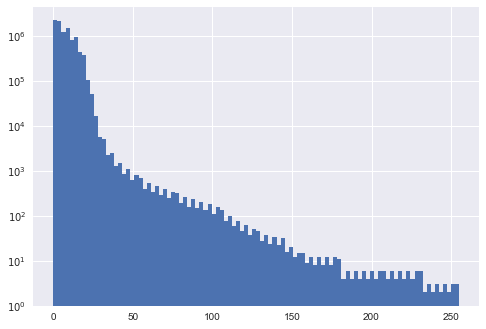

In [224]:
plt.hist(train_sample['token_id'], log = True, bins = 100);
#Note: we have transformed the scale to log

#### Closer anlaysis of sentences with lesser tokens

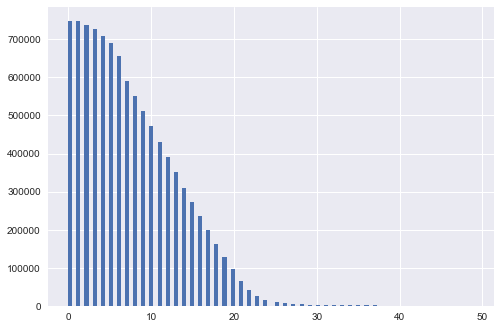

In [282]:
token_hist = plt.hist(train_sample['token_id'][train_sample['token_id'] < 50], bins = 100);

In [289]:
percent = ((token_hist[0]/train_sample.shape[0]) * 100)

for i in range(5):
    percent_data = round(sum(percent[0:((i+1)*10)]),2)
    token_size = token_hist[1][(i+1)*10]
    
    print(percent_data, "% of data with tokens less than " ,round(token_size))

37.03 % of data with tokens less than  5.0
67.25 % of data with tokens less than  10.0
86.96 % of data with tokens less than  15.0
97.0 % of data with tokens less than  20.0
99.43 % of data with tokens less than  24.0


### Analysing of tokens within a class

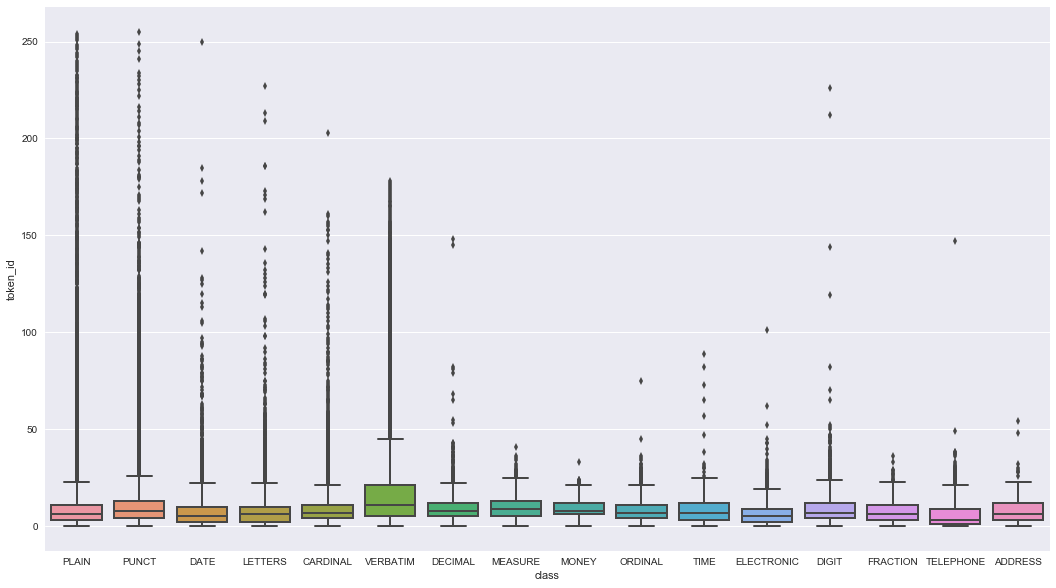

In [175]:
fig, ax = plt.subplots()
fig.set_size_inches(18,10)
sns.boxplot( y ='token_id', x = 'class', data = train_sample , linewidth = 2)

#### Log scale - closer analysis

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning:

divide by zero encountered in log



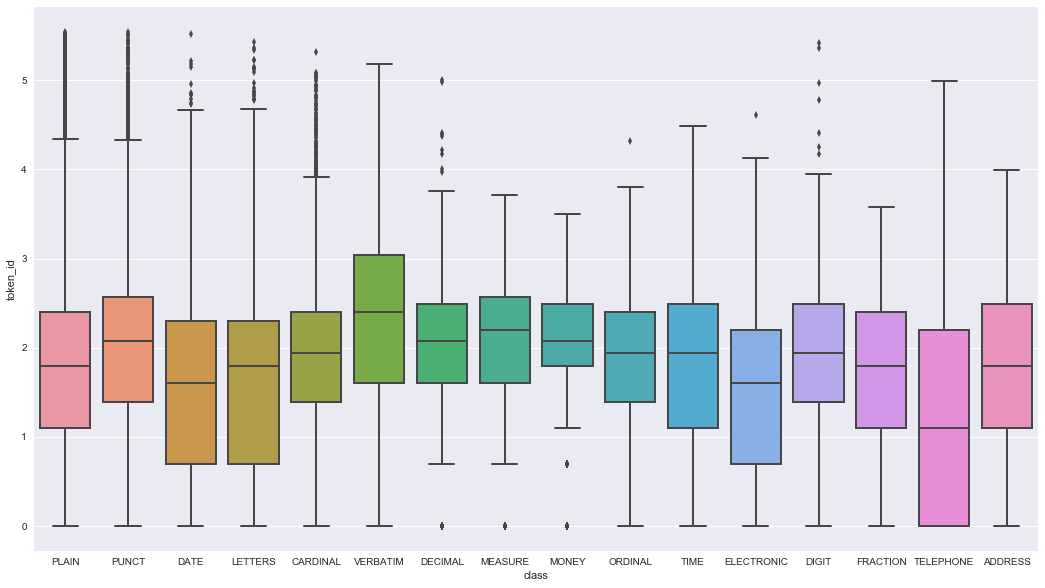

In [176]:
fig, ax = plt.subplots()
fig.set_size_inches(18,10)
sns.boxplot( y =np.log(train_sample['token_id']), x = 'class', data = train_sample , linewidth = 2)

#### Plain, Punctuation and Verbatim ususally have higher token values
#### Telephone mostly appears at the beginning of the sentence

In [177]:
max_token = pd.DataFrame(train_sample[['class','sentence_id','token_id']].
                         groupby(['sentence_id'])['token_id'].agg({'max_token':'max'}))

In [178]:
train_sample_token = pd.merge(left = train_sample, right = max_token, right_index = True, how = 'left', left_on = 'sentence_id')

train_sample_token['relative_position'] = (train_sample_token['token_id'])/(train_sample_token['max_token'])


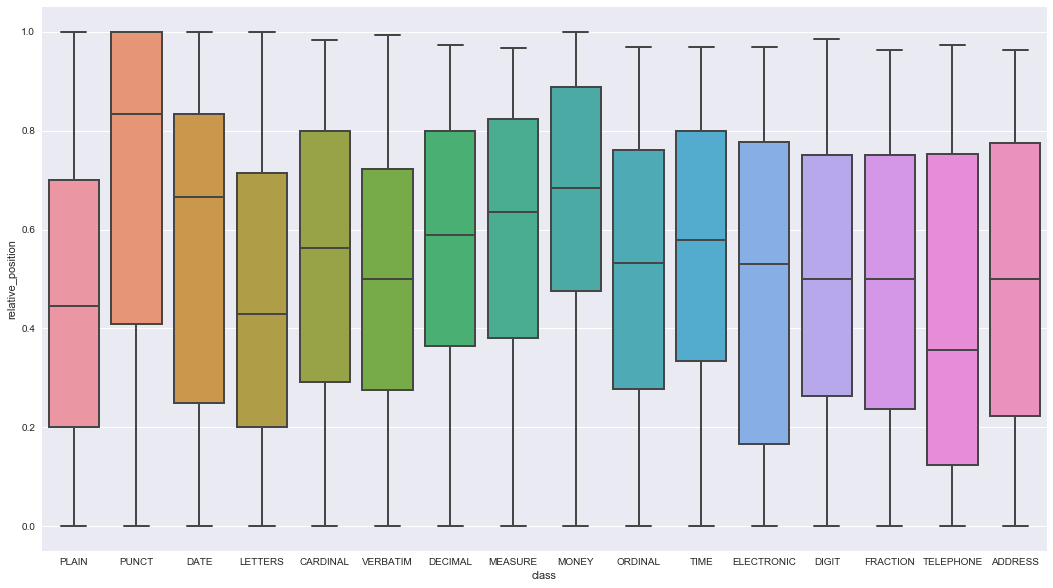

In [179]:
fig, ax = plt.subplots()
fig.set_size_inches(18,10)
sns.boxplot( y ='relative_position', x = 'class', data = train_sample_token , linewidth = 2)

#### Certainly punctuations should appear at the end of the sentance, and it is how it is in the training data set. Telephone number seems to occur relatively at the beginning of the sentence.

### Analysing the changed tokens

In [11]:
train_sample_change = train_sample[train_sample['change'] == True]

In [12]:
train_sample_change['class'].unique()

array(['DATE', 'LETTERS', 'CARDINAL', 'PLAIN', 'VERBATIM', 'DECIMAL',
       'MEASURE', 'MONEY', 'ORDINAL', 'TIME', 'DIGIT', 'FRACTION',
       'ELECTRONIC', 'TELEPHONE', 'ADDRESS'], dtype=object)

### Analysing each class
### Date

In [30]:
#Sample of date class
class_val = 'DATE' 

train_wc = train_sample_change[train_sample_change['class'] == class_val]
train_all_wc = train_sample[train_sample['class'] == class_val]

print(train_wc.head())
print(train_wc.tail())
#Note: All of the date format is changed in the output

     sentence_id  token_id class          before  \
10             1         0  DATE            2006   
51             3         7  DATE            2007   
80             5         0  DATE            2008   
111            8         1  DATE    4 March 2014   
147           11         1  DATE  April 10, 2013   

                                   after change  
10                      two thousand six   True  
51                    two thousand seven   True  
80                    two thousand eight   True  
111  the fourth of march twenty fourteen   True  
147          april tenth twenty thirteen   True  
         sentence_id  token_id class           before  \
9918259       748054         1  DATE     October 1865   
9918267       748054         9  DATE  14 January 1867   
9918276       748054        18  DATE             1866   
9918311       748056         8  DATE             1291   
9918414       748064         6  DATE    December 2008   

                                            

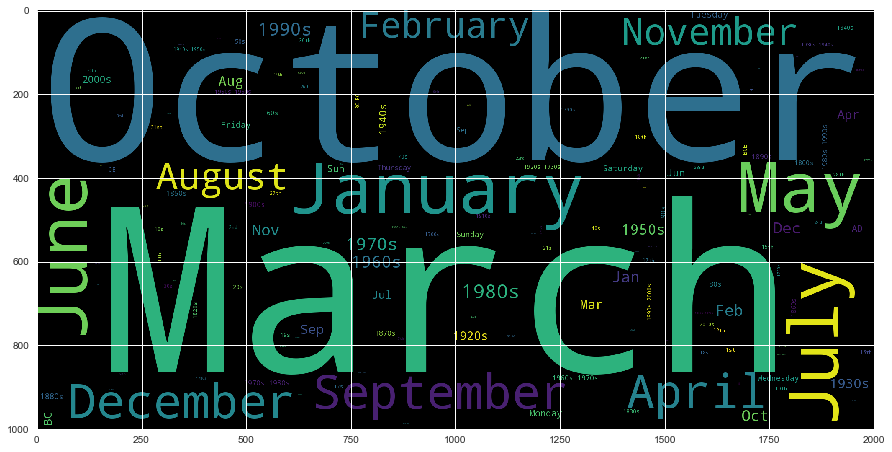

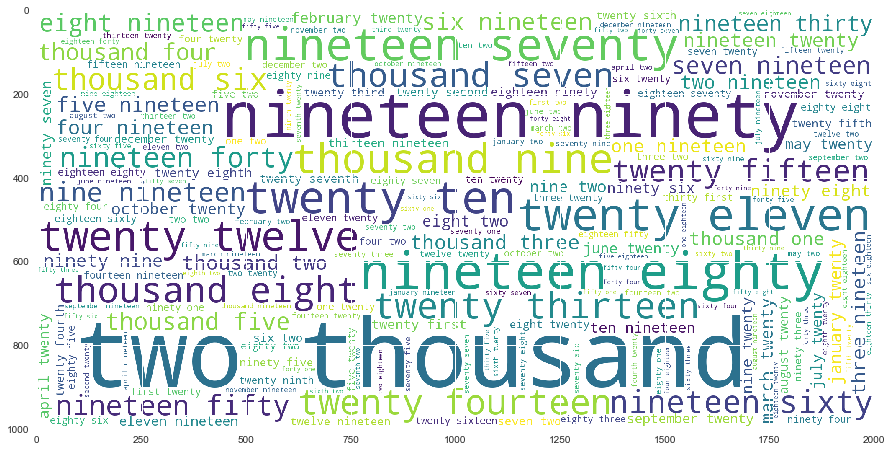

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC_all = WordCloud(width = 2000, height = 1000).generate(' '.join(train_all_wc['before'].astype(str)))
plt.imshow(WC_all)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC = WordCloud(width = 2000, height = 1000,background_color = "white").generate(' '.join(train_wc['after'].astype(str)))
plt.imshow(WC)

#### Note: Few of the normalization is seen as twenty eleven and few as two thousand and eleven

### Letters

In [32]:
#Sample of date class
class_val = 'LETTERS' 

train_wc = train_sample_change[train_sample_change['class'] == class_val]
train_all_wc = train_sample[train_sample['class'] == class_val]

print(train_wc.head())
print(train_wc.tail())
#Note: All of the letter format is changed in the output

     sentence_id  token_id    class before    after change
11             1         1  LETTERS   IUCN  i u c n   True
115            9         2  LETTERS     BC      b c   True
159           14         2  LETTERS   ALCS  a l c s   True
201           18         2  LETTERS     C.        c   True
205           18         6  LETTERS     J.        j   True
         sentence_id  token_id    class before    after change
9917955       748032        19  LETTERS   publ  p u b l   True
9917968       748034         2  LETTERS   ISBN  i s b n   True
9918162       748047        12  LETTERS    SPD    s p d   True
9918169       748047        19  LETTERS    CSU    c s u   True
9918360       748061         4  LETTERS    vun    v u n   True


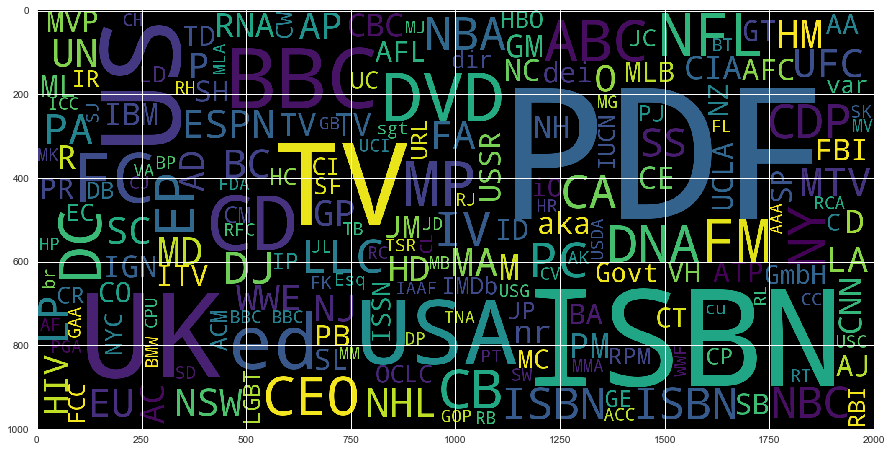

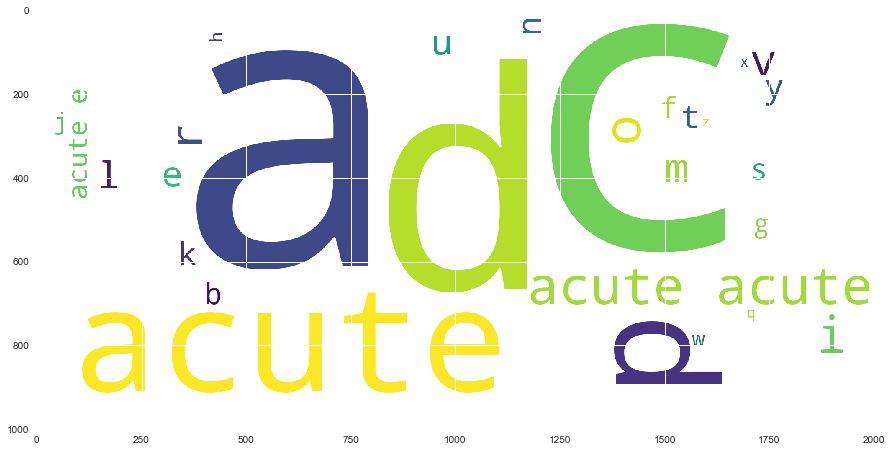

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC_all = WordCloud(width = 2000, height = 1000).generate(' '.join(train_all_wc['before'].astype(str)))
plt.imshow(WC_all)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC = WordCloud(width = 2000, height = 1000,background_color = "white").generate(' '.join(train_wc['after'].astype(str)))
plt.imshow(WC)

### Cardinal

In [34]:
#Sample of date class
class_val = 'CARDINAL' 

train_wc = train_sample_change[train_sample_change['class'] == class_val]
train_all_wc = train_sample[train_sample['class'] == class_val]

print(train_wc.head())
print(train_wc.tail())
#Note: There are numbers/roman numerals

     sentence_id  token_id     class before        after change
95             6         3  CARDINAL     91   ninety one   True
116            9         3  CARDINAL      3        three   True
143           10         8  CARDINAL     35  thirty five   True
161           14         4  CARDINAL      2          two   True
280           24         4  CARDINAL      3        three   True
         sentence_id  token_id     class before                     after  \
9918127       748045         4  CARDINAL    463  four hundred sixty three   
9918178       748048         6  CARDINAL    126    one hundred twenty six   
9918189       748048        17  CARDINAL     30                    thirty   
9918341       748059         3  CARDINAL     25               twenty five   
9918405       748063        21  CARDINAL     II                       two   

        change  
9918127   True  
9918178   True  
9918189   True  
9918341   True  
9918405   True  


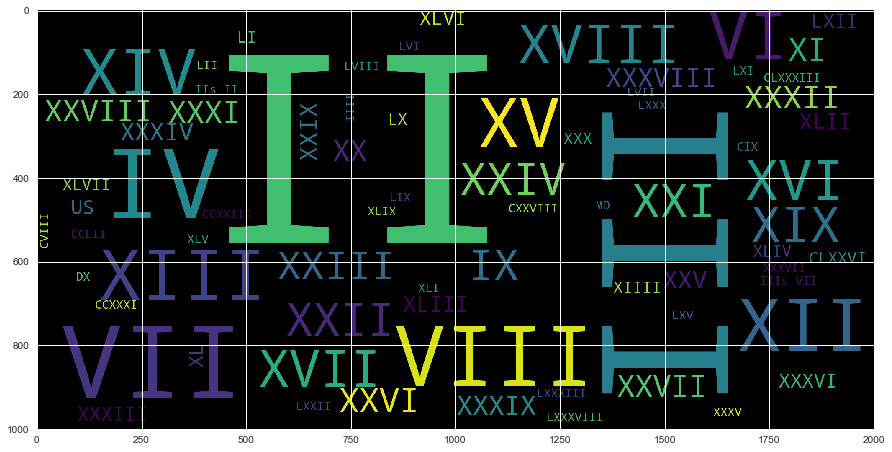

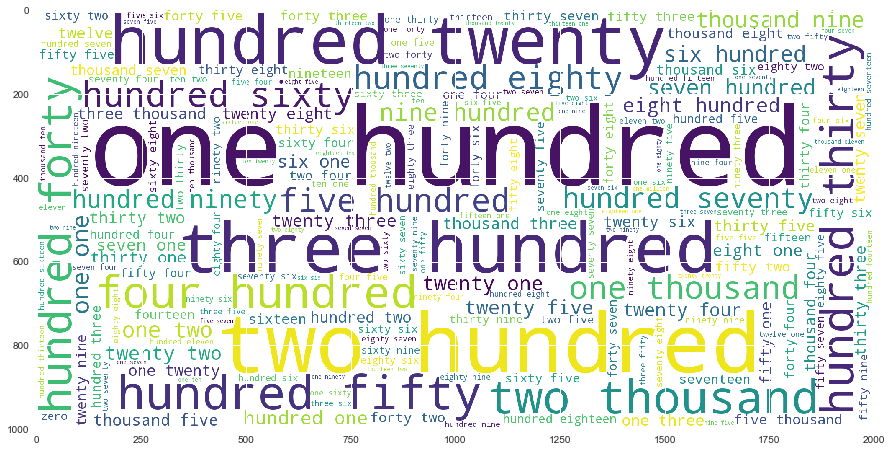

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC_all = WordCloud(width = 2000, height = 1000).generate(' '.join(train_all_wc['before'].astype(str)))
plt.imshow(WC_all)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC = WordCloud(width = 2000, height = 1000,background_color = "white").generate(' '.join(train_wc['after'].astype(str)))
plt.imshow(WC)

### PLAIN

In [36]:
#Sample of date class
class_val = 'PLAIN' 

train_wc = train_sample_change[train_sample_change['class'] == class_val]
train_all_wc = train_sample[train_sample['class'] == class_val]

print(train_wc.head(10))
print(train_wc.tail(10))
#Note: There are numbers/roman numerals

      sentence_id  token_id  class  before              after change
142            10         7  PLAIN     vol             volume   True
165            14         8  PLAIN      vs             versus   True
535            43         6  PLAIN   PbSO4  lead two sulphate   True
556            44         6  PLAIN       -                 to   True
651            49        16  PLAIN      st              saint   True
776            58         7  PLAIN       -                 to   True
790            59        11  PLAIN      st              saint   True
1054           81         0  PLAIN     vol             volume   True
1063           81         9  PLAIN     vol             volume   True
1091           84         5  PLAIN  colour              color   True
         sentence_id  token_id  class          before           after change
9916458       747928         3  PLAIN              st           saint   True
9916601       747940        23  PLAIN             vol          volume   True
9917006   

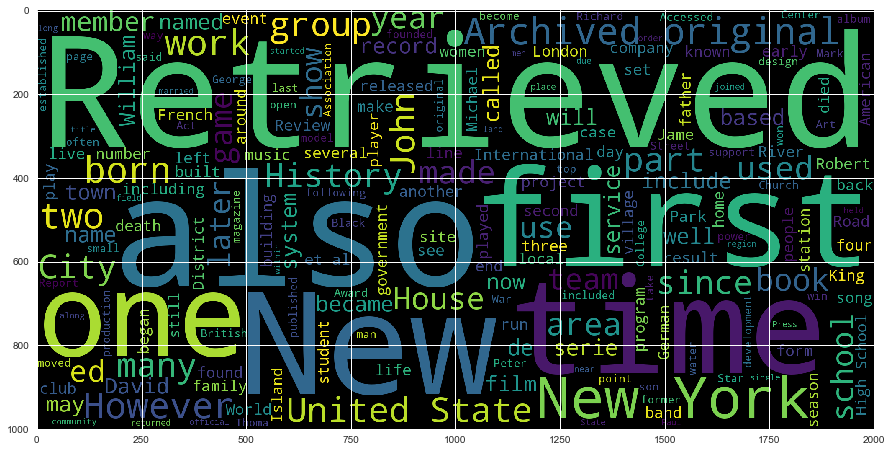

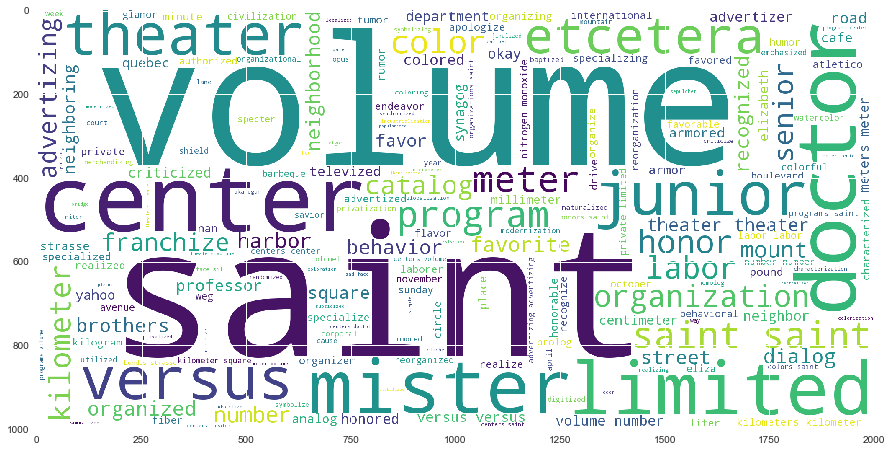

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC_all = WordCloud(width = 2000, height = 1000).generate(' '.join(train_all_wc['before'].astype(str)))
plt.imshow(WC_all)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC = WordCloud(width = 2000, height = 1000, background_color = "white").generate(' '.join(train_wc['after'].astype(str)))
plt.imshow(WC)

### VERBATIM

In [38]:
#Sample of date class
class_val = 'VERBATIM' 

train_wc = train_sample_change[train_sample_change['class'] == class_val]
train_all_wc = train_sample[train_sample['class'] == class_val]

print(train_wc.head(10))
print(train_wc.tail(10))

      sentence_id  token_id     class before   after change
279            24         3  VERBATIM      #  number   True
724            54        11  VERBATIM      &     and   True
1839          141        12  VERBATIM     pp     p p   True
3463          279         3  VERBATIM      &     and   True
4095          337         3  VERBATIM      &     and   True
4248          348         6  VERBATIM     pp     p p   True
4461          365         2  VERBATIM      &     and   True
6020          487         1  VERBATIM      Σ   sigma   True
6021          487         2  VERBATIM      η     eta   True
6022          487         3  VERBATIM      κ   kappa   True
         sentence_id  token_id     class  before        after change
9912928       747663         4  VERBATIM  pkgsrc  p k g s r c   True
9914301       747767         8  VERBATIM       &          and   True
9914323       747769         6  VERBATIM       &          and   True
9914675       747794        14  VERBATIM       &          and   

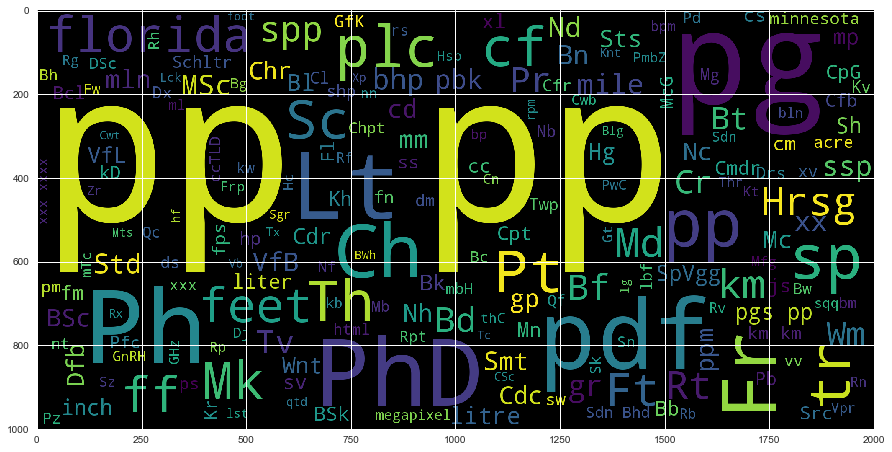

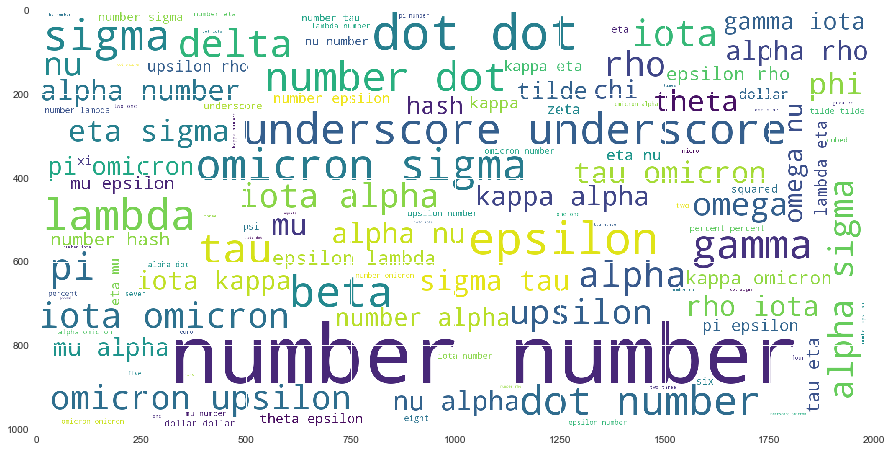

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC_all = WordCloud(width = 2000, height = 1000).generate(' '.join(train_all_wc['before'].astype(str)).strip())
plt.imshow(WC_all)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC = WordCloud(width = 2000, height = 1000, background_color = "white").generate(' '.join(train_wc['after'].astype(str)).strip())
plt.imshow(WC)

### MEASURE

In [40]:
#Sample of date class
class_val = 'MEASURE' 

train_wc = train_sample_change[train_sample_change['class'] == class_val]
train_all_wc = train_sample[train_sample['class'] == class_val]

print(train_wc.head(10))
print(train_wc.tail(10))
#Note: There are numbers/roman numerals

      sentence_id  token_id    class     before  \
1654          130        12  MEASURE      100 m   
2120          167         4  MEASURE      60 km   
3266          263         4  MEASURE        60%   
4024          331         7  MEASURE      16.4%   
4032          331        15  MEASURE      57.6%   
4996          406         7  MEASURE     79.20%   
5001          406        12  MEASURE     59.30%   
6301          511        11  MEASURE        63%   
7214          586         4  MEASURE        1GB   
8856          718        15  MEASURE  578.3/km2   

                                                  after change  
1654                                 one hundred meters   True  
2120                                   sixty kilometers   True  
3266                                      sixty percent   True  
4024                         sixteen point four percent   True  
4032                      fifty seven point six percent   True  
4996                   seventy nine point two o 

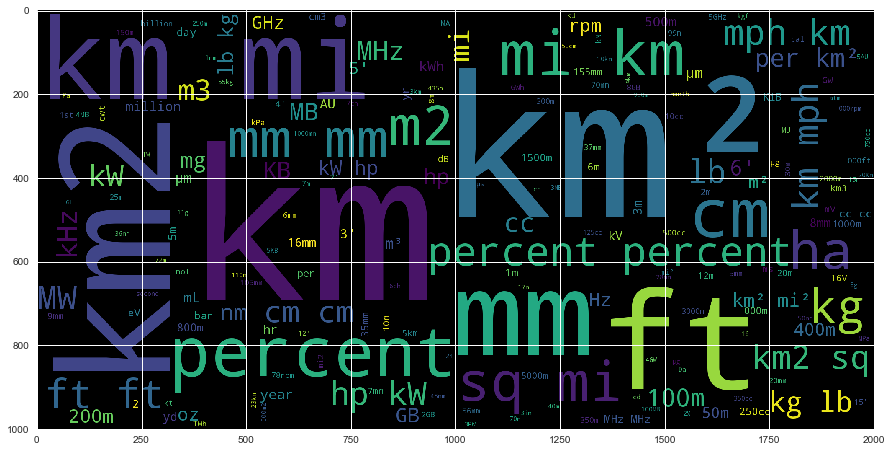

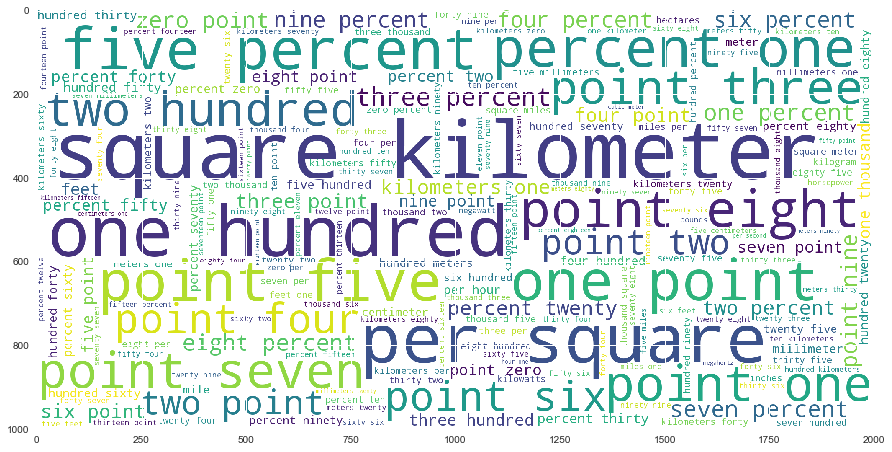

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC_all = WordCloud(width = 2000, height = 1000).generate(' '.join(train_all_wc['before'].astype(str)))
plt.imshow(WC_all)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC = WordCloud(width = 2000, height = 1000, background_color = "white").generate(' '.join(train_wc['after'].astype(str)))
plt.imshow(WC)

### ORDINAL

In [42]:
#Sample of date class
class_val = 'ORDINAL' 

train_wc = train_sample_change[train_sample_change['class'] == class_val]
train_all_wc = train_sample[train_sample['class'] == class_val]

print(train_wc.head(10))
print(train_wc.tail(10))
#Note: There are numbers/roman numerals

       sentence_id  token_id    class before         after change
2231           174         7  ORDINAL    4th        fourth   True
5625           453         5  ORDINAL   21st  twenty first   True
6266           508         1  ORDINAL     V.     the fifth   True
7668           627         3  ORDINAL      I     the first   True
8085           661        16  ORDINAL   18th    eighteenth   True
9120           740        12  ORDINAL   19th    nineteenth   True
10133          829         2  ORDINAL    2nd        second   True
10535          864        17  ORDINAL   20th     twentieth   True
11662          952        12  ORDINAL    2nd        second   True
12040          986         9  ORDINAL      X     the tenth   True
         sentence_id  token_id    class before          after change
9914714       747796        19  ORDINAL   19th     nineteenth   True
9915182       747831         5  ORDINAL   11th       eleventh   True
9915463       747849         5  ORDINAL   24th  twenty fourth   Tru

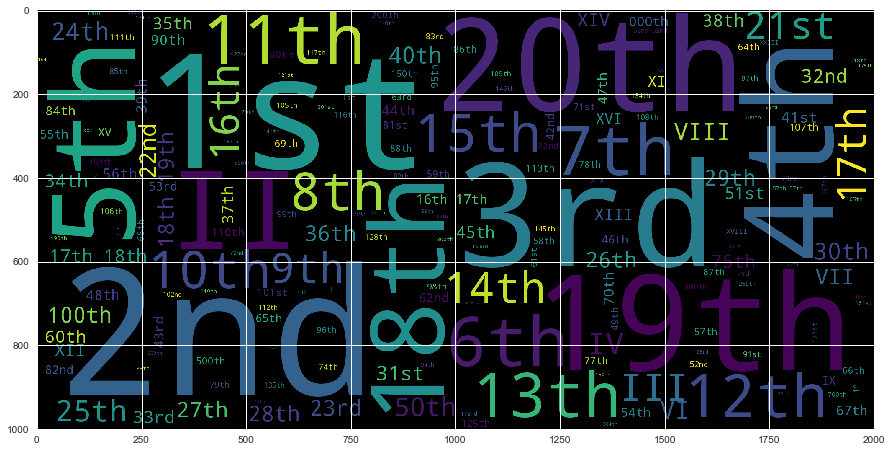

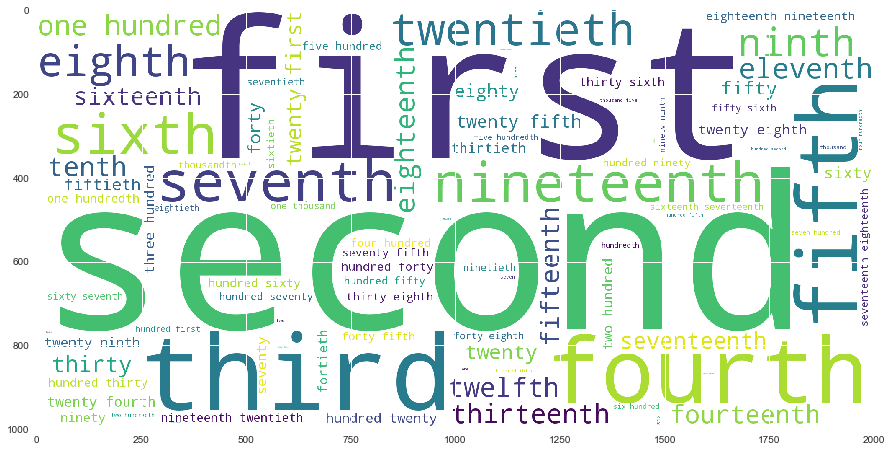

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC_all = WordCloud(width = 2000, height = 1000).generate(' '.join(train_all_wc['before'].astype(str)))
plt.imshow(WC_all)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC = WordCloud(width = 2000, height = 1000,background_color = "white").generate(' '.join(train_wc['after'].astype(str)))
plt.imshow(WC)

### DECIMAL

In [44]:
#Sample of date class
class_val = 'DECIMAL' 

train_wc = train_sample_change[train_sample_change['class'] == class_val]
train_all_wc = train_sample[train_sample['class'] == class_val]

print(train_wc.head(10))
print(train_wc.tail(10))
#Note: There are numbers/roman numerals

      sentence_id  token_id    class       before  \
1058           81         4  DECIMAL         .161   
1067           81        13  DECIMAL           .6   
2280          179        15  DECIMAL          1.6   
2449          192         7  DECIMAL         .267   
2454          192        12  DECIMAL         .266   
2687          213         1  DECIMAL          .13   
4672          381         6  DECIMAL        108.5   
6764          551        10  DECIMAL          .70   
8025          657         3  DECIMAL  1.7 million   
8712          708         5  DECIMAL         2.42   

                             after change  
1058             point one six one   True  
1067                     point six   True  
2280                 one point six   True  
2449           point two six seven   True  
2454             point two six six   True  
2687               point one three   True  
4672  one hundred eight point five   True  
6764                 point seven o   True  
8025       one point

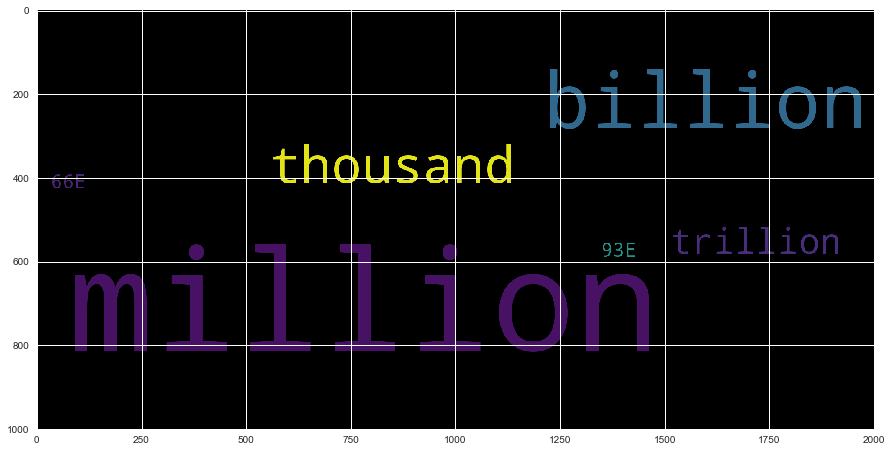

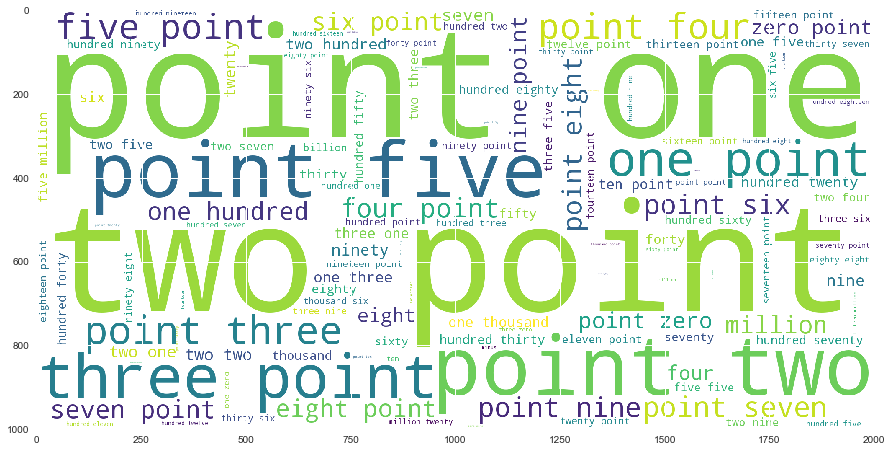

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC_all = WordCloud(width = 2000, height = 1000).generate(' '.join(train_all_wc['before'].astype(str)))
plt.imshow(WC_all)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC = WordCloud(width = 2000, height = 1000,background_color = "white").generate(' '.join(train_wc['after'].astype(str)))
plt.imshow(WC)

### MONEY

In [46]:
#Sample of date class
class_val = 'MONEY' 

train_wc = train_sample_change[train_sample_change['class'] == class_val]
train_all_wc = train_sample[train_sample['class'] == class_val]

print(train_wc.head(10))
print(train_wc.tail(10))
#Note: There are numbers/roman numerals

       sentence_id  token_id  class        before  \
1851           142        10  MONEY       $22,750   
1861           142        20  MONEY       $29,583   
5305           432         7  MONEY    $1,000,000   
5311           432        13  MONEY    $1,070,000   
8727           709         6  MONEY       $29,545   
8729           709         8  MONEY       $21,946   
15390         1256         9  MONEY   $80 million   
16464         1332         8  MONEY       $13,559   
17973         1460         6  MONEY  £3.4 million   
20524         1643         5  MONEY       $36,000   

                                                   after change  
1851     twenty two thousand seven hundred fifty dollars   True  
1861   twenty nine thousand five hundred eighty three...   True  
5305                                 one million dollars   True  
5311                one million seventy thousand dollars   True  
8727   twenty nine thousand five hundred forty five d...   True  
8729   twenty one th

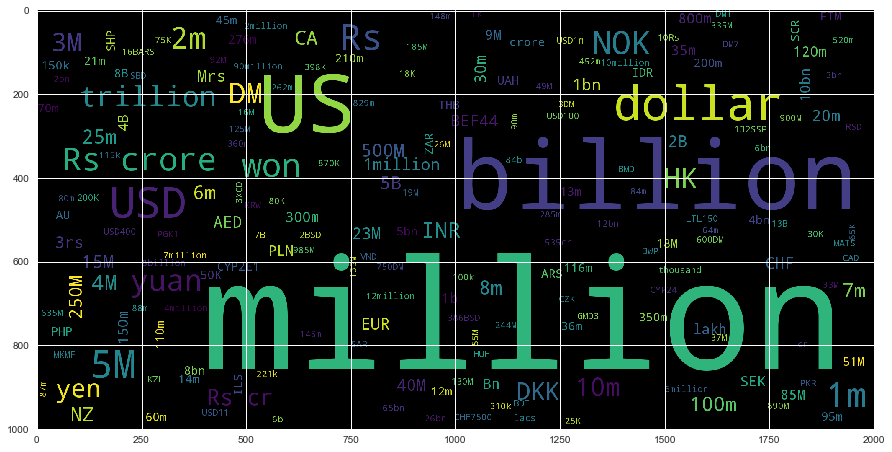

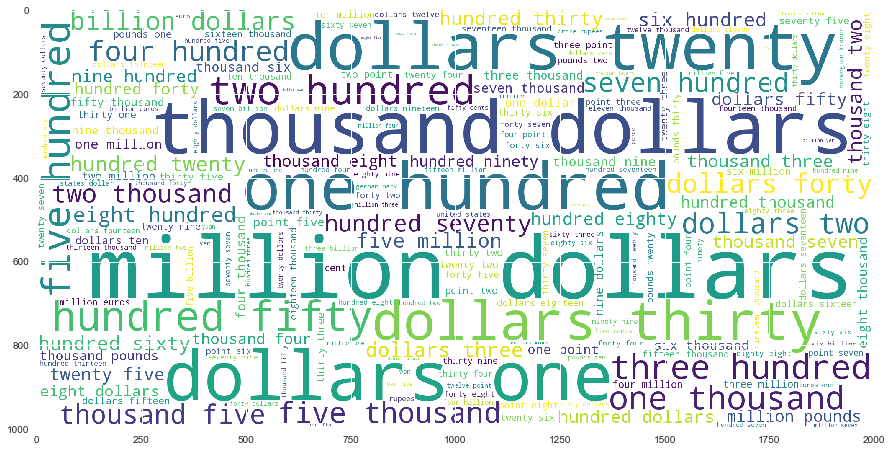

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC_all = WordCloud(width = 2000, height = 1000).generate(' '.join(train_all_wc['before'].astype(str)))
plt.imshow(WC_all)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
random.seed(0)
WC = WordCloud(width = 2000, height = 1000,background_color = "white").generate(' '.join(train_wc['after'].astype(str)))
plt.imshow(WC)

### -Work in progress